In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Logitech Tastatur: Schnell
file_path = ".\AUTO_Logitech_Gaming_Keyboard_G213_1ms_1.csv"
data_start_line = 15 
data_gk = pd.read_csv(file_path, sep=';', skiprows=data_start_line)
data_gk['latency'] = data_gk['latency'] / 1000 # für millisekunden
data_gk = data_gk["latency"]

data_gk.head()

0    2.978
1    2.986
2    2.362
3    2.273
4    2.266
Name: latency, dtype: float64

In [3]:
# Acer Tastatur: Langsam
file_path = ".\AUTO_6312kw_0ms_1.csv"
data_start_line = 7
data_acer = pd.read_csv(file_path, sep=';', skiprows=data_start_line)
data_acer['latency'] = data_acer['latency'] / 1000 # für millisekunden
data_acer = data_acer["latency"]

data_acer.head()

0    39.583
1    45.107
2    31.571
3    45.996
4    64.480
Name: latency, dtype: float64

In [4]:
# simon task daten einlesen
file_path = "log.txt" 

simon_data = pd.read_csv(file_path, sep=r"\s+", header=None, names=["side", "response", "condition", "error", "reaction_time"])
simon_data.head()

,side,response,condition,error,reaction_time
0,left,rightresponse,incompatible,1,364
1,right,rightresponse,compatible,1,364
2,right,leftresponse,incompatible,1,375
3,right,rightresponse,incompatible,2,384
4,right,leftresponse,incompatible,1,278


In [5]:
compatible_simon_data = simon_data[simon_data['condition'] == 'compatible']
compatible_simon_data_success = compatible_simon_data[compatible_simon_data["error"] == 1]
compatible_simon_data_success = compatible_simon_data_success["reaction_time"]
compatible_simon_data_total = len(compatible_simon_data)
compatible_simon_data_failed = len(compatible_simon_data[compatible_simon_data["error"] == 2])
compatible_simon_error_rate = compatible_simon_data_failed / compatible_simon_data_total * 100

incompatible_simon_data = simon_data[simon_data['condition'] == 'incompatible']
incompatible_simon_data_success = incompatible_simon_data[incompatible_simon_data["error"] == 1]
incompatible_simon_data_success = incompatible_simon_data_success["reaction_time"]
incompatible_simon_data_total = len(incompatible_simon_data)
incompatible_simon_data_failed = len(incompatible_simon_data[incompatible_simon_data["error"] == 2])
incompatible_simon_error_rate = incompatible_simon_data_failed / incompatible_simon_data_total * 100

print(f"Compatible Condition Error Rate: {compatible_simon_error_rate:.2f}%")
print(f"Incompatible Condition Error Rate: {incompatible_simon_error_rate:.2f}%")


Compatible Condition Error Rate: 18.22%
Incompatible Condition Error Rate: 20.00%


In [26]:
# Parameter der Simulation
n_simulationen = 50  # Anzahl der Monte-Carlo-Läufe

# fürn Bildschirm auch gleich in ms
refresh_cycle_min = 0  # Minimaler Zeitwert innerhalb eines Refresh-Cycles
refresh_cycle_max = 16.66  # Maximaler Zeitwert innerhalb eines Refresh-Cycles
constant_delay_min = 5  # Mindestverzögerung in ms
# constant_delay_max = 12

fast_refresh_cycle_min = 0  # Minimaler Zeitwert innerhalb eines Refresh-Cycles
fast_refresh_cycle_max = 4

In [27]:
refresh_cycle_delay = np.random.uniform(refresh_cycle_min, refresh_cycle_max, n_simulationen)
# constant_delay = np.random.uniform(constant_delay_min, constant_delay_max, n_simulationen)
constant_delay = 5
bildschirm_latenzen = refresh_cycle_delay + constant_delay
len(bildschirm_latenzen)

50

In [28]:
fast_refresh_cycle_delay = np.random.uniform(fast_refresh_cycle_min, fast_refresh_cycle_max, n_simulationen)
constant_delay = 5
fast_bildschirm_latenzen = fast_refresh_cycle_delay + constant_delay
len(bildschirm_latenzen)

50

In [29]:
eingabe_latenzen_gk = np.random.choice(data_gk, size=n_simulationen, replace=True) # replace ist mit zurücklegen
eingabe_latenzen_acer = np.random.choice(data_acer, size=n_simulationen, replace=True)

reaction_time_compatible = np.random.choice(compatible_simon_data_success, size=n_simulationen, replace=True)
reaction_time_incompatible = np.random.choice(compatible_simon_data_success, size=n_simulationen, replace=True)

In [30]:
# gesamtverzögerung schnelle tastatur
gesamtverzögerung_compatible_gk = eingabe_latenzen_gk + reaction_time_compatible + bildschirm_latenzen
gesamtverzögerung_incompatible_gk = eingabe_latenzen_gk + reaction_time_incompatible + bildschirm_latenzen

In [31]:
# gesamtverzögerung langsame tastatur
gesamtverzögerung_compatible_acer = eingabe_latenzen_acer + reaction_time_compatible + fast_bildschirm_latenzen
gesamtverzögerung_incompatible_acer = eingabe_latenzen_acer + reaction_time_incompatible + fast_bildschirm_latenzen

In [32]:
# Gesamtverzögerungen schnelle Tastatur
gk_compatible_mean_final = np.mean(gesamtverzögerung_compatible_gk)
gk_compatible_std_final = np.std(gesamtverzögerung_compatible_gk)
gk_incompatible_mean_final = np.mean(gesamtverzögerung_incompatible_gk)
gk_incompatible_std_final = np.std(gesamtverzögerung_incompatible_gk)
print(f"Compatible - Mittelwert der Gesamtverzögerung Gaming Keyboard: {gk_compatible_mean_final:.2f} ms")
print(f"Compatible - Standardabweichung der Gesamtverzögerung Gaming Keyboard: {gk_compatible_std_final:.2f} ms")
print(f"Incompatible - Mittelwert der Gesamtverzögerung Gaming Keyboard: {gk_incompatible_mean_final:.2f} ms")
print(f"Incompatible - Standardabweichung der Gesamtverzögerung Gaming Keyboard: {gk_incompatible_std_final:.2f} ms")

Compatible - Mittelwert der Gesamtverzögerung Gaming Keyboard: 386.98 ms
Compatible - Standardabweichung der Gesamtverzögerung Gaming Keyboard: 91.80 ms
Incompatible - Mittelwert der Gesamtverzögerung Gaming Keyboard: 407.34 ms
Incompatible - Standardabweichung der Gesamtverzögerung Gaming Keyboard: 111.46 ms


In [33]:
# Gesamtverzögerungen langsame Tastatur
acer_compatible_mean_final = np.mean(gesamtverzögerung_compatible_acer)
acer_compatible_std_final = np.std(gesamtverzögerung_compatible_acer)
acer_incompatible_mean_final = np.mean(gesamtverzögerung_incompatible_acer)
acer_incompatible_std_final = np.std(gesamtverzögerung_incompatible_acer)
print(f"Compatible - Mittelwert der Gesamtverzögerung Acer Keyboard: {acer_compatible_mean_final:.2f} ms")
print(f"Compatible - Standardabweichung der Gesamtverzögerung Acer Keyboard: {acer_compatible_std_final:.2f} ms")
print(f"Incompatible - Mittelwert der Gesamtverzögerung Acer Keyboard: {acer_incompatible_mean_final:.2f} ms")
print(f"Incompatible - Standardabweichung der Gesamtverzögerung Acer Keyboard: {acer_incompatible_std_final:.2f} ms")

Compatible - Mittelwert der Gesamtverzögerung Acer Keyboard: 426.40 ms
Compatible - Standardabweichung der Gesamtverzögerung Acer Keyboard: 93.35 ms
Incompatible - Mittelwert der Gesamtverzögerung Acer Keyboard: 446.76 ms
Incompatible - Standardabweichung der Gesamtverzögerung Acer Keyboard: 111.24 ms


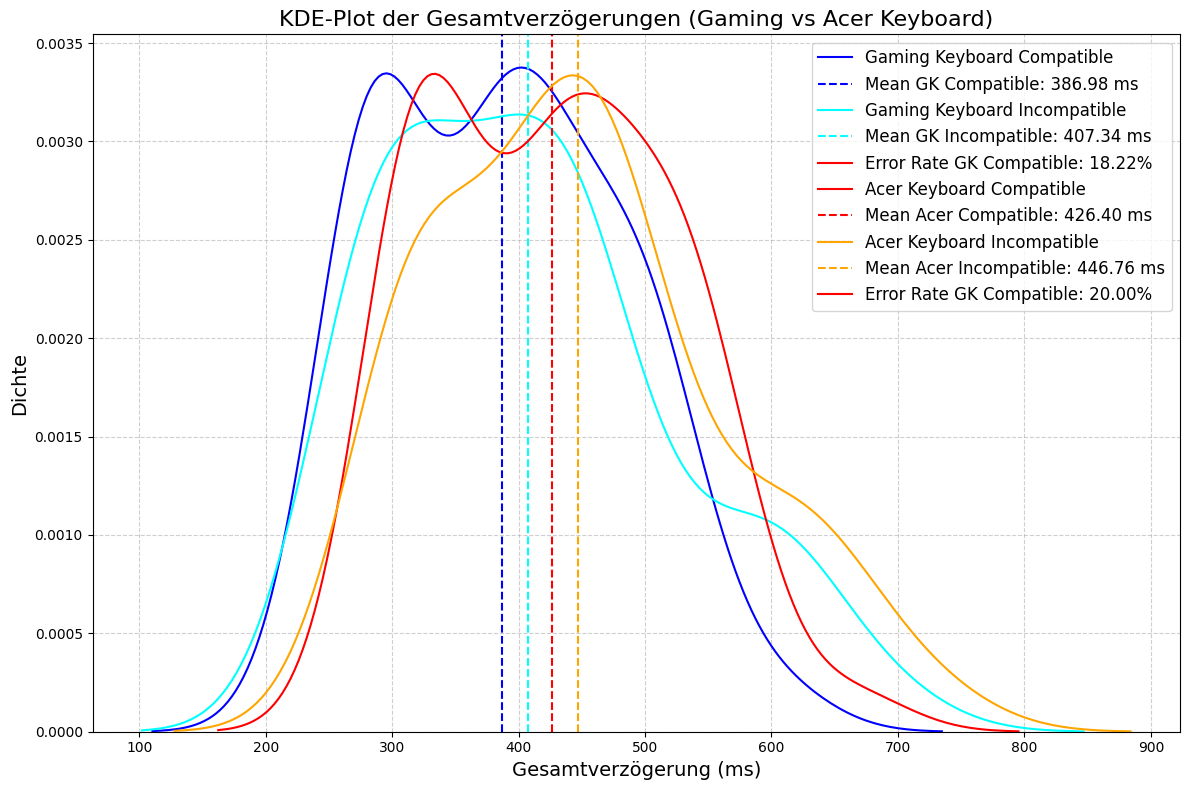

In [34]:
# KDE-Plot erstellen
plt.figure(figsize=(12, 8))

# KDE für Gaming Keyboard (compatible)
sns.kdeplot(gesamtverzögerung_compatible_gk, label="Gaming Keyboard Compatible", color='blue')
plt.axvline(np.mean(gesamtverzögerung_compatible_gk), color='blue', linestyle='--', label=f"Mean GK Compatible: {gk_compatible_mean_final:.2f} ms")

# KDE für Gaming Keyboard (incompatible)
sns.kdeplot(gesamtverzögerung_incompatible_gk, label="Gaming Keyboard Incompatible", color='cyan')
plt.axvline(np.mean(gesamtverzögerung_incompatible_gk), color='cyan', linestyle='--', label=f"Mean GK Incompatible: {gk_incompatible_mean_final:.2f} ms")

plt.plot([], [], color='red', label=f"Error Rate GK Compatible: {compatible_simon_error_rate:.2f}%")

# KDE für Acer Keyboard (compatible)
sns.kdeplot(gesamtverzögerung_compatible_acer, label="Acer Keyboard Compatible", color='red')
plt.axvline(np.mean(gesamtverzögerung_compatible_acer), color='red', linestyle='--', label=f"Mean Acer Compatible: {acer_compatible_mean_final:.2f} ms")

# KDE für Acer Keyboard (incompatible)
sns.kdeplot(gesamtverzögerung_incompatible_acer, label="Acer Keyboard Incompatible", color='orange')
plt.axvline(np.mean(gesamtverzögerung_incompatible_acer), color='orange', linestyle='--', label=f"Mean Acer Incompatible: {acer_incompatible_mean_final:.2f} ms")


plt.plot([], [], color='red', label=f"Error Rate GK Compatible: {incompatible_simon_error_rate:.2f}%")

# plt.axvspan(gk_compatible_mean_final - gk_compatible_std_final, gk_compatible_mean_final + gk_compatible_std_final, color='green', alpha=0.2, label="±1 Std Dev (GK Compatible)")

# Achsentitel und Legende
plt.title("KDE-Plot der Gesamtverzögerungen (Gaming vs Acer Keyboard)", fontsize=16)
plt.xlabel("Gesamtverzögerung (ms)", fontsize=14)
plt.ylabel("Dichte", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Plot anzeigen
plt.tight_layout()
plt.show()


In [35]:
# Eine höhere Varianz zeigt, dass die Datenpunkte stärker um den Mittelwert streuen, d. h., die Werte liegen weiter voneinander entfernt.
# wurzel davon is Standardabweichung
var_gk_compatible = np.var(gesamtverzögerung_compatible_gk)
var_gk_incompatible = np.var(gesamtverzögerung_incompatible_gk)
var_acer_compatible = np.var(gesamtverzögerung_compatible_acer)
var_acer_incompatible = np.var(gesamtverzögerung_incompatible_acer)
print("GK:")
print("comp: " + str(var_gk_compatible))
print("incomp: " + str(var_gk_incompatible))
print("ACER:")
print("comp: " + str(var_acer_compatible))
print("incomp: " + str(var_acer_incompatible))


GK:
comp: 8427.220561810896
incomp: 12423.999856961726
ACER:
comp: 8714.900920544385
incomp: 12373.268154921569
